<a href="https://colab.research.google.com/github/sovunia-hub/machine-learning/blob/main/car_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import plot_tree
import sklearn.datasets as datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = datasets.fetch_openml(name='car', version="3")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
data = df.get('data')
data.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
target = df.get('target')
target.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: category
Categories (4, object): ['acc', 'good', 'unacc', 'vgood']

In [ ]:
data_dummies = pd.get_dummies(data, prefix=data.columns)
data_dummies = data_dummies[data_dummies.columns].astype('float')
X_train, X_test, Y_train, Y_test = train_test_split(data_dummies, target)

# Дерево

In [ ]:
model_DTC = tree.DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
preds_DTC = model_DTC.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test, preds_DTC))

[[ 91   2   4   1]
 [  1  16   0   3]
 [  5   0 295   0]
 [  2   0   0  12]]


In [ ]:
print(classification_report(Y_test, preds_DTC))

              precision    recall  f1-score   support

         acc       0.92      0.93      0.92        98
        good       0.89      0.80      0.84        20
       unacc       0.99      0.98      0.98       300
       vgood       0.75      0.86      0.80        14

    accuracy                           0.96       432
   macro avg       0.89      0.89      0.89       432
weighted avg       0.96      0.96      0.96       432



In [ ]:
print(model_DTC.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


|--- feature_12 <= 0.50
|   |--- feature_19 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |   |--- feature_18

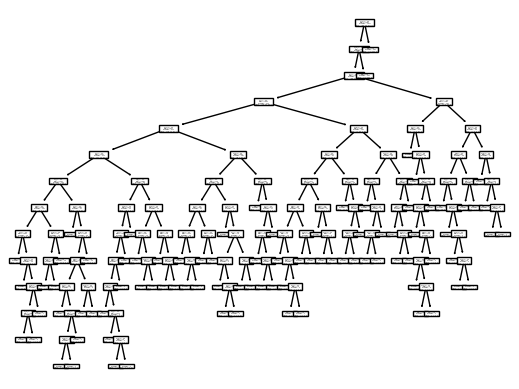

In [ ]:
plot_tree(model_DTC)
print(tree.export_text(model_DTC))

In [ ]:
model_DT_gscv = tree.DecisionTreeClassifier()
params_grid = {
    "max_depth": [None, 2, 4, 6],
    "max_leaf_nodes": [None, 1, 2],
    "min_samples_leaf": [1, 2, 3]
    }

grid_search_DTC = GridSearchCV(estimator=model_DT_gscv,
                                  param_grid=params_grid)

In [ ]:
grid_search_DTC.fit(np.array(X_train), np.array(Y_train))
preds_train = grid_search_DTC.best_estimator_.predict(np.array(X_test))

In [ ]:
print(classification_report(Y_test, preds_train))

              precision    recall  f1-score   support

         acc       0.92      0.92      0.92        98
        good       0.94      0.85      0.89        20
       unacc       0.98      0.98      0.98       300
       vgood       0.75      0.86      0.80        14

    accuracy                           0.96       432
   macro avg       0.90      0.90      0.90       432
weighted avg       0.96      0.96      0.96       432



In [ ]:
grid_search_DTC.best_params_

{'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1}

In [ ]:
print(tree.export_text(grid_search_DTC.best_estimator_))

|--- feature_12 <= 0.50
|   |--- feature_19 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |   |--- feature_18

# Стекинг

In [ ]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = SVC()

model_STC = ensemble.StackingClassifier(estimators=[('lr', clf1), ('knn', clf2), ('svc', clf3)])
model_STC.fit(X_train, Y_train)
preds_STC = model_STC.predict(X_test)
print(confusion_matrix(Y_test, preds_STC))

[[ 97   1   0   0]
 [  0  15   0   5]
 [ 10   1 289   0]
 [  0   0   0  14]]


In [ ]:
print(classification_report(Y_test, preds_STC))

              precision    recall  f1-score   support

         acc       0.91      0.99      0.95        98
        good       0.88      0.75      0.81        20
       unacc       1.00      0.96      0.98       300
       vgood       0.74      1.00      0.85        14

    accuracy                           0.96       432
   macro avg       0.88      0.93      0.90       432
weighted avg       0.96      0.96      0.96       432



# Бэггинг

In [ ]:
model_RFC = ensemble.RandomForestClassifier()
model_RFC.fit(X_train, Y_train)
preds_RFC = model_RFC.predict(X_test)
print(confusion_matrix(Y_test, preds_RFC))

[[ 94   1   2   1]
 [  2  13   0   5]
 [ 10   0 290   0]
 [  1   0   0  13]]


In [ ]:
print(classification_report(Y_test, preds_RFC))

              precision    recall  f1-score   support

         acc       0.88      0.96      0.92        98
        good       0.93      0.65      0.76        20
       unacc       0.99      0.97      0.98       300
       vgood       0.68      0.93      0.79        14

    accuracy                           0.95       432
   macro avg       0.87      0.88      0.86       432
weighted avg       0.95      0.95      0.95       432



In [ ]:
model_RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Бустинг

In [ ]:
model_GBC = ensemble.GradientBoostingClassifier()
model_GBC.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
preds_GBC = model_GBC.predict(X_test)
print(confusion_matrix(Y_test, preds_GBC))

[[ 95   2   0   1]
 [  0  17   0   3]
 [  7   2 291   0]
 [  0   0   0  14]]


In [ ]:
print(classification_report(Y_test, preds_GBC))

              precision    recall  f1-score   support

         acc       0.93      0.97      0.95        98
        good       0.81      0.85      0.83        20
       unacc       1.00      0.97      0.98       300
       vgood       0.78      1.00      0.88        14

    accuracy                           0.97       432
   macro avg       0.88      0.95      0.91       432
weighted avg       0.97      0.97      0.97       432

